# **MACS207b : Disruption Problem**
## *Ayoub BENABBOU & Samy AIMEUR*

## **Enoncé**



Imagine that we have events we describe by a point process $N$. At the beginning of the observation, events occur according to a Poisson process intensity $λ_0$ until a time τ and then switch to a new regime which is still a Poisson process but with intensity $λ_1$. We suppose that we know $λ_0$ and $λ_1$ but not $\tau$. We still know that $\tau$ follows an exponential distribution of parameter $\sigma$.

We want to estimate $\tau$.

by the observation of a single trajectory.

We denote by $F_t=σ(N(s), s≤t)$
the σ-field which contains the information given by the trajectory up to time t. We set $Z^(t)=P(τ≤t|Ft)$

We have shown that:

$\hat{Z}(t)=\int_0^t h(s)(1−\hat{Z}(s)) ds + \int_0^t\frac{(b−a)\hat{Z}(s^−)(1−\hat{Z}(s^−))}{\hat{λ}(s)}(dN(s)−\hat{λ}(s) ds)$ (1)



## **Questions**

##### **Question 1**: From the last equation, describe the dynamics of $\hat Z$ between its jumps and give the size of its jumps.


We can develop (1) to obtain:

$$
\hat{Z}(t) = \int_0^t h(s)(1−\hat{Z}(s)) \, ds - \int_0^t (\lambda_1−\lambda_0 )\hat{Z}(s)(1−\hat{Z}(s)) \, ds + \sum_{T_k \le t} \frac{(\lambda_1−\lambda_0 )\hat{Z}(T_k^-)(1−\hat{Z}(T_k^-))}{\lambda_0 + (\lambda_1-\lambda_0 ) \hat{Z}(T_k^-)}
$$

Before $t$ reaches $T_n$ , that is when $t$ is in the interval $[T_{n-1}, T_{n}[$, the dynamics of $\hat{Z}$ are given by:

$$
\hat{Z}(t) - \hat{Z}(T_{n-1}) = \int_0^t (h(s) - (\lambda_1-\lambda_0 )\hat{Z}(s))(1−\hat{Z}(s)) \, ds
$$

Alternatively, in the interval $[T_{n-1}, T_{n}[$, $\hat{Z}(t)$ satisfies the following differential equation:

$$
y'(t) = (h(t) - (\lambda_1-\lambda_0 )y(t))(1-y(t)), \quad \text{with} \quad y(T_{n-1}) = \hat{Z}(T_{n-1})
$$

And when $t$ reaches $T_n$, the amplitude of the jump is:

$$
\frac{(\lambda_1-\lambda_0 )\hat{Z}(T_n^-)(1−\hat{Z}(T_n^-))}{\lambda_0 + (\lambda_1-\lambda_0 ) \hat{Z}(T_n^-)}
$$


##### **Question 2**: Simulate a sample path of $N$ and then the corresponding trajectory of $\hat{Z}$.

In [33]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

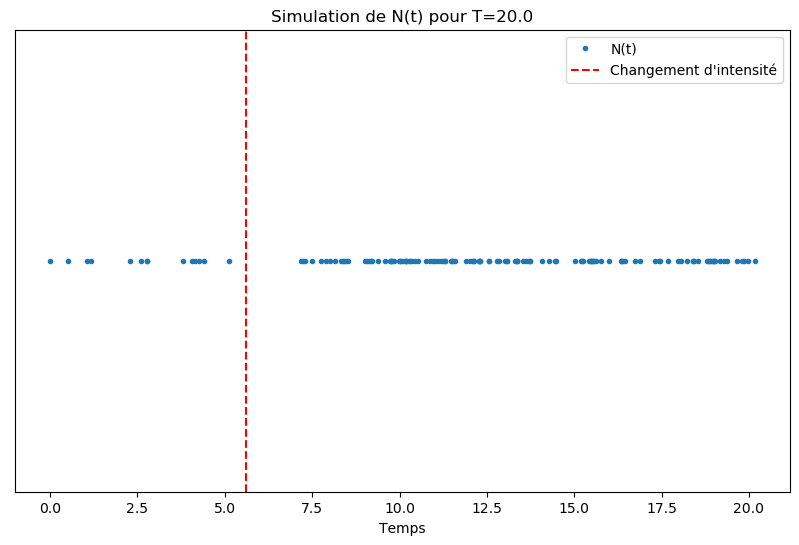

In [34]:
#Initialisation des paramètres
lamba0 = 2
lamba1 = 10
sigma = 0.1

#Simulation de N
def simu(T):
    temps = [0]
    tau = np.random.exponential(1/sigma) #tau generated at random
    while temps[-1] < T :
        if temps[-1] < tau :
            temps.append(temps[-1]+np.random.exponential(1/lamba0))
        else :
            temps.append(temps[-1]+np.random.exponential(1/lamba1))
    return np.array(temps), tau

data, tau = simu(2/sigma)



def plot_N(data, tau):
    plt.figure(figsize=(10, 6))
    plt.plot(data, np.zeros(len(data)), 'o', markersize=3)
    plt.axvline(x= tau, color='red', linestyle='--') #Changement d'intensité
    plt.title('Simulation de N(t) pour T='+str(2/sigma))
    plt.xlabel('Temps')
    plt.legend(['N(t)', 'Changement d\'intensité'])
    plt.gca().set_yticks([])
    plt.show()

plot_N(data, tau)

In [35]:
#Simulation de Z^
import scipy.integrate

def h(t):
    return stats.expon.pdf(t, scale=1/sigma)/(1-stats.expon.cdf(t, scale=1/sigma))

def f(y, t):
    return (h(t)-(lamba1-lamba0)*y)*(1-y)

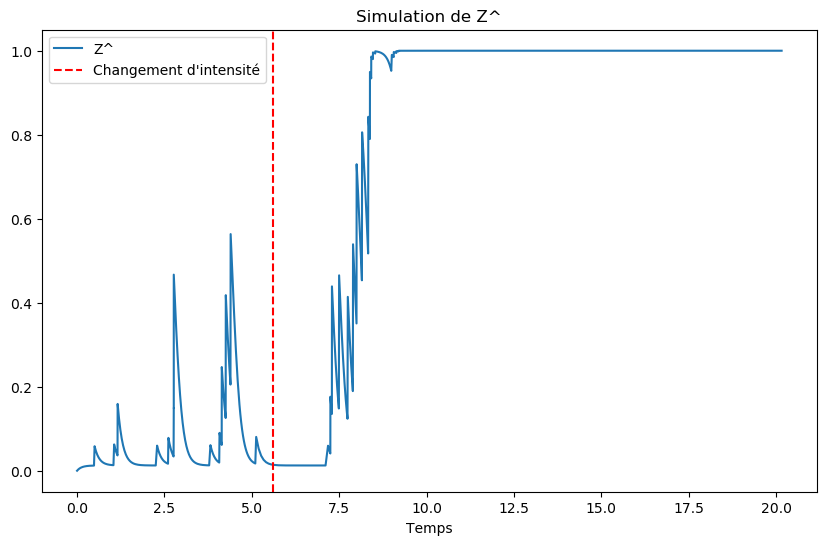

In [36]:
#We initialize Z^ and time to 0 to make the recursive loop work

def Z(data):
    Z=[0]
    time=[0]

    for i in range(len(data)-1):
        init = ( (lamba1-lamba0) * Z[-1] * (1-Z[-1]) ) / (lamba0 + (lamba1 - lamba0)*Z[-1]) #Amplitude du saut
        t =  np.linspace(data[i], data[i+1], 30)[:-1] #On enlève le dernier élément pour éviter les doublons
        time += t.tolist()
        Z += scipy.integrate.odeint(f, init + Z[-1], t).flatten().tolist() #entre deux sauts

    time = time[1:] #On enlève le 0 initial
    Z = Z[1:] #On enlève le 0 initial
    return Z,time

def plot_Z(Zhat, time, tau):
    plt.figure(figsize=(10, 6))
    plt.plot(time,Zhat)
    plt.axvline(x= tau, color='red', linestyle='--') #Changement d'intensité
    plt.xlabel('Temps')
    plt.legend(['Z^', 'Changement d\'intensité'])
    plt.title('Simulation de Z^')
    plt.show()

Zhat, time = Z(data)
plot_Z(Zhat, time,tau)

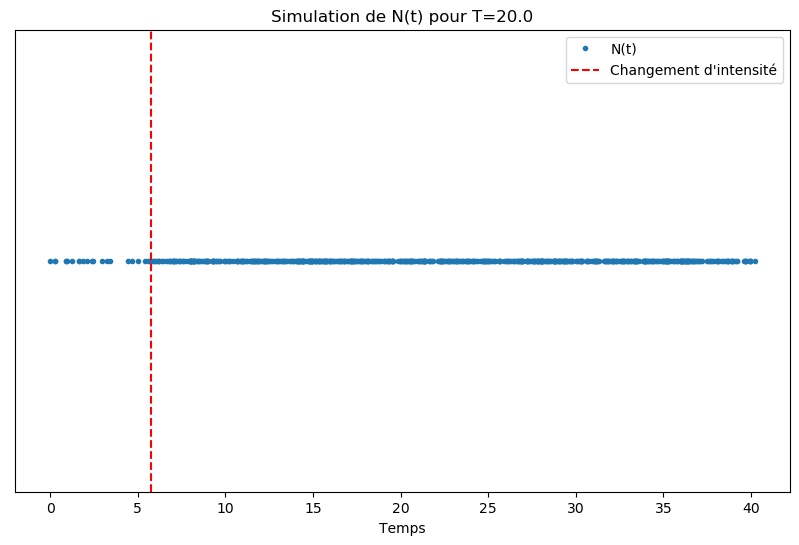

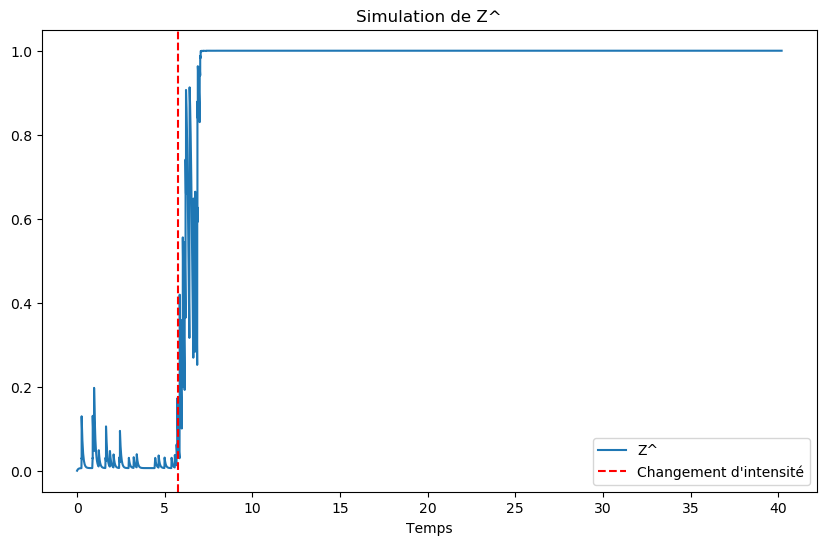

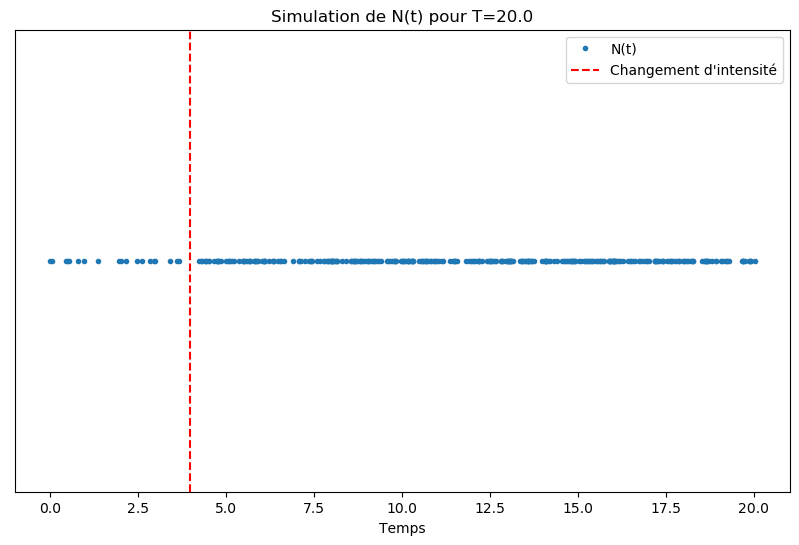

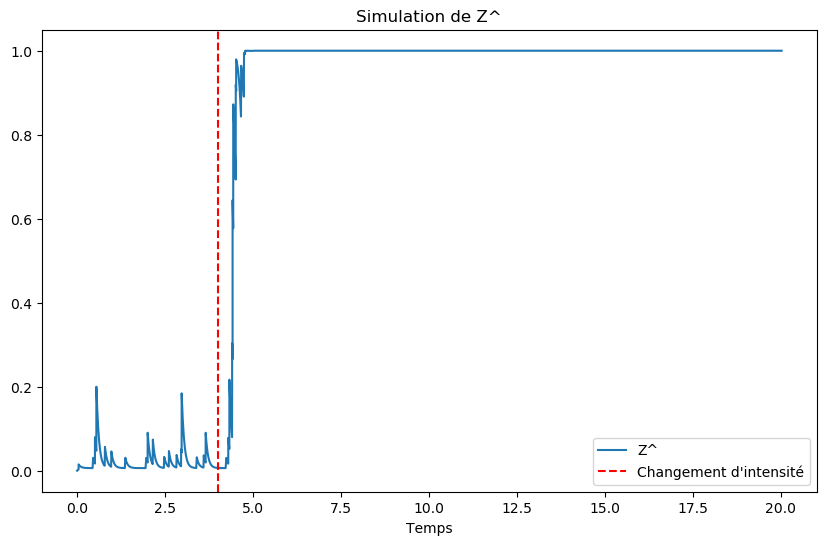

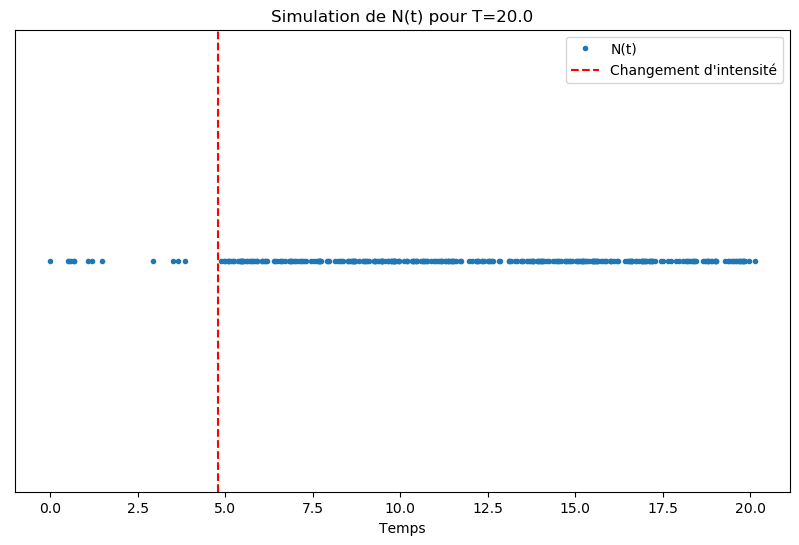

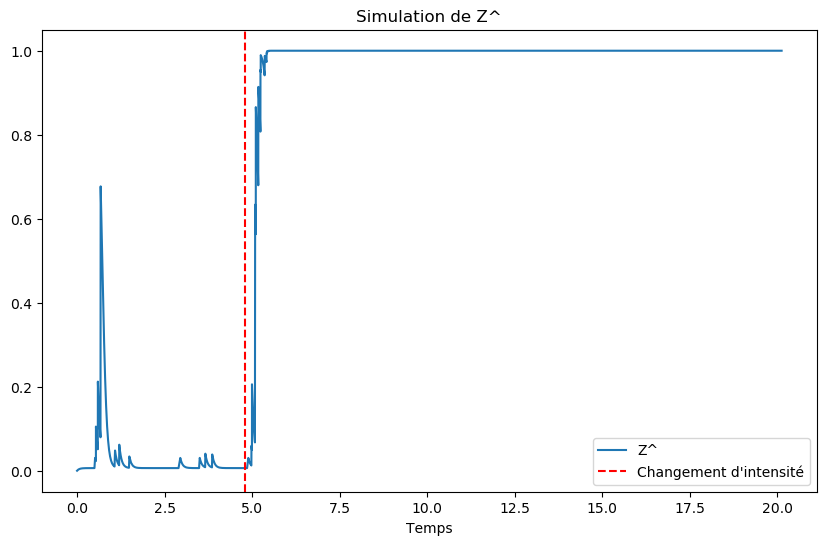

In [37]:
#Essayons differentes simulations

lamba0 = 4
lamba1 = 20
sigma = 0.1

data, tau = simu(4/sigma)
Zhat, time = Z(data)
plot_N(data, tau)
plot_Z(Zhat, time,tau)

data, tau = simu(2/sigma)
Zhat, time = Z(data)
plot_N(data, tau)
plot_Z(Zhat, time,tau)

data, tau = simu(2/sigma)
Zhat, time = Z(data)
plot_N(data, tau)
plot_Z(Zhat, time,tau)

##### **Question 3**: Suppose that $\hat{Z}$ is the true observation, what is a criterion to estimate $\tau$ ?

Si l'on observe que $\hat{Z}(t)$, qui est égale à $\mathbb{P}( \tau \leq t | N(t))$, on peut estimer $\tau$ en prenant le temps $t_0$ à partir duquel $\hat{Z}(t)$ dépasse un certain seuil $\alpha$ et ne descend plus en dessous.

Plus formelement $ t_0 = $ $inf${$t, Z(t) > \alpha $ }. Maintenant, la qualité de notre estimation dependra de notre $\alpha$.

On remarque que pour $\lambda_0 \approx \lambda_1$, $\hat{Z}(t)$ peut avoir plusieurs pics au-dessus de $0.5$ qui reste au-dessus de cette valeur, mais pour $\lambda_0 << \lambda_1$, il n'y aucun pic qui dépasse ne serait que 0.2 et qui resterait au-dessus. Nous dessidons donc de choisir un seuil en fonction du rapport $\frac{\lambda_0}{\lambda_1}$ qui est une donnée de l'énoncé.

Empiriquement, on fait le choix de poser $\alpha = (\frac{\lambda_0}{\lambda_1}) $.

De plus, $\tau$ tombe de manière uniformement dans un temps généré par une loi exponentielle de paramètre $\lambda_0$, mais l'effet du changement de régime arrive seulement à la fin de ce temps d'attente où le premier sample avec une intensité $\lambda_1$ est généré. Donc, à ce temps $t_0$, on retire la moitié du temps moyen d'attente du premier régime (= $\frac{1}{2\lambda_0})$.

Finalement, on approche $\tau$ avec $inf${ $t, Z(t) > (\frac{\lambda_0}{\lambda_1}) $ } - $\frac{1}{2\lambda_0}$.

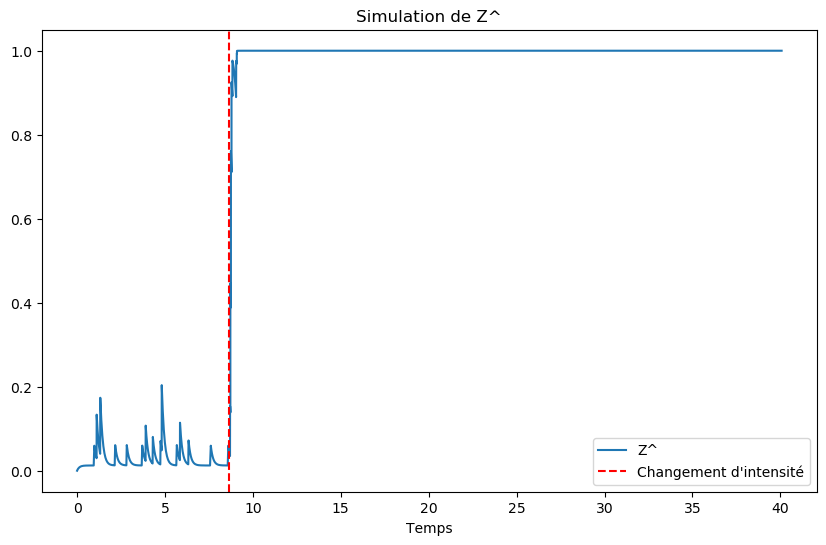

Valeur de tau : 8.659265092047612
Valeur de tau_hat : 8.468976531183543


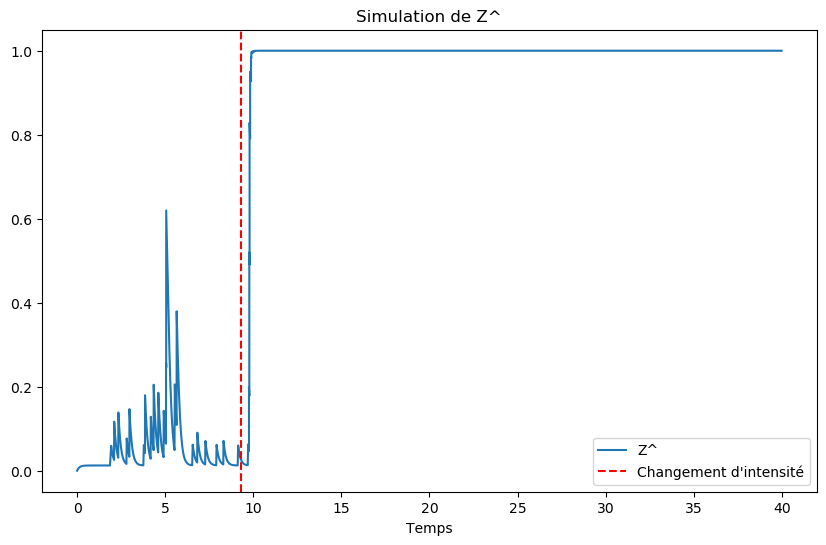

Valeur de tau : 9.302149511303002
Valeur de tau_hat : 9.526244054327533


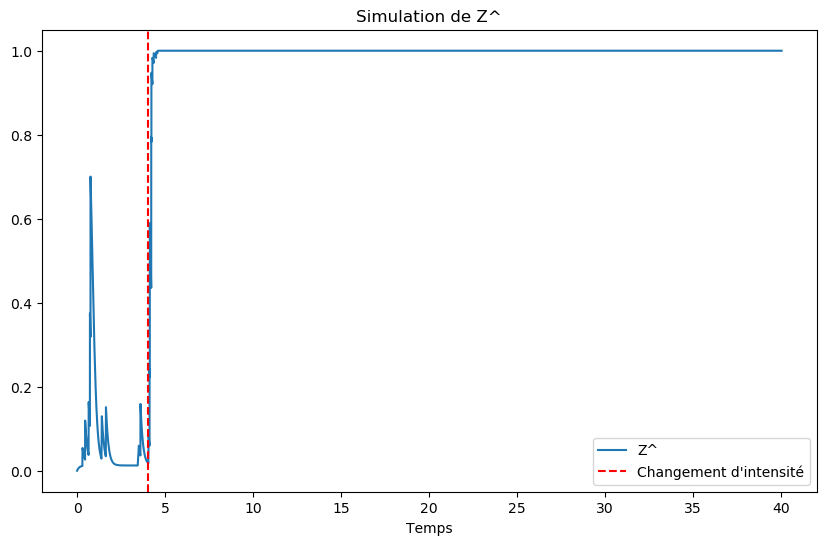

Valeur de tau : 4.055750995278506
Valeur de tau_hat : 3.869494027530205


In [38]:
#Test de l'approximation de tau
def tau_hat(Zhat, time):
    tab = np.array(Zhat) > (lamba0/lamba1) #mask
    ind = np.where(tab == False)[0][-1]+1
    return time[min(len(time)-1,ind)]- 1/(2*lamba0)


lamba0 = 2
lamba1 = 10
sigma = 0.1

data, tau = simu(4/sigma)
Zhat, time = Z(data)
plot_Z(Zhat, time,tau)
print('Valeur de tau :', tau)
print('Valeur de tau_hat :', tau_hat(Zhat, time))

data, tau = simu(4/sigma)
Zhat, time = Z(data)
plot_Z(Zhat, time,tau)
print('Valeur de tau :', tau)
print('Valeur de tau_hat :', tau_hat(Zhat, time))

data, tau = simu(4/sigma)
Zhat, time = Z(data)
plot_Z(Zhat, time,tau)
print('Valeur de tau :', tau)
print('Valeur de tau_hat :', tau_hat(Zhat, time))


In [39]:
#On teste maintenant la méthode sur plusieurs simulations
#rapport = 5
lamba0 = 2
lamba1 = 10
sigma = 0.1
N = 10
tau_hat_tab0 = np.zeros(N)
tau_tab0 = np.zeros(N)

for i in range(N):
    data, tau = simu(4/sigma)
    Zhat, time = Z(data)
    tau_hat_tab0[i] = tau_hat(Zhat, time)
    tau_tab0[i] = tau
print('Moyenne de l\'erreur pour un rapport = ', lamba1/lamba0,' : ', np.mean(np.abs(tau_hat_tab0-tau_tab0)))


#rapport = 2
lamba0 = 2
lamba1 = 4
sigma = 0.1
N = 10
tau_hat_tab1 = np.zeros(N)
tau_tab1 = np.zeros(N)

for i in range(N):
    data, tau = simu(4/sigma)
    Zhat, time = Z(data)
    tau_hat_tab1[i] = tau_hat(Zhat, time)
    tau_tab1[i] = tau

print('Moyenne de l\'erreur pour un rapport = ', lamba1/lamba0,' : ', np.mean(np.abs(tau_hat_tab1-tau_tab1)))

Moyenne de l'erreur pour un rapport =  5.0  :  0.5681444604214897
Moyenne de l'erreur pour un rapport =  2.0  :  2.277513143452172


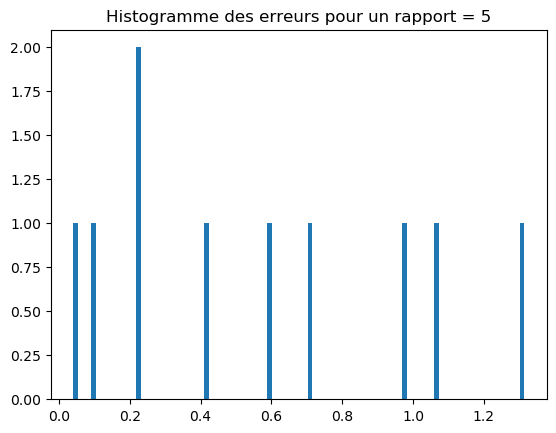

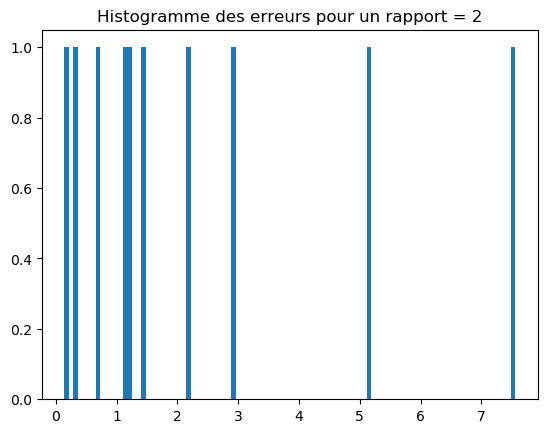

In [40]:
#hitogramme
plt.hist(np.abs(tau_hat_tab0-tau_tab0), bins=100)
plt.title('Histogramme des erreurs pour un rapport = 5')
plt.show()

plt.hist(np.abs(tau_hat_tab1-tau_tab1), bins=100)
plt.title('Histogramme des erreurs pour un rapport = 2')
plt.show()

##### **Question 4**: Open question : which technique(s) of data analysis could be used to answer the same question with or without the Poisson hypothesis ? To get an hint of the performance, give it a ty on the Poisson situation.

We could train a neural network to predict the time $\tau$.

The model that we will propose is a neural network with 3 linear layers, that takes in input a vector of the first ? points of the simulated process, and gives as output the instant $\tau$ corresponding to the changing of parameter.

The choice of this model an be justfied by the fact that the task of predicting $\tau$ is not linear, and we have the universal approximation theorem, that states that a neural network can approximate this function as precisely as we want.


In [89]:
#Definition of the model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Tau(torch.nn.Module):
  # 3 linear layers
  def __init__(self):
    super(Tau, self).__init__()
    self.layer_1 = nn.Linear(200,50)
    self.layer_2 = nn.Linear(50,10)
    self.layer_3 = nn.Linear(10,1)

  def forward(self, x):
    #input x will correspond to the vecot of the first 200 points of our process
    x= F.relu(self.layer_1(x))
    x= F.relu(self.layer_2(x))
    x= self.layer_3(x)
    return x


'class Net(torch.nn.Module):\n    def __init__(self):\n        super(Net, self).__init__()\n        self.ll1=nn.Linear(200, 64)\n        self.ll2=nn.Linear(64, 16)\n        self.ll3=nn.Linear(16,4)\n        self.ll4=nn.Linear(4,1)\n\n    def forward(self, x):\n        x = F.relu(self.ll1(x))\n        x = F.relu(self.ll2(x))\n        x = F.relu(self.ll3(x))\n        x = self.ll4(x)\n        return x'

In [42]:
def simu_nn(num_samples, sample_size):
  samples = np.zeros((num_samples, sample_size))
  taus = np.zeros(num_samples)
  for i in range(num_samples):
    tau = np.random.exponential(1/sigma)
    taus[i] = tau
    for j in range(1,sample_size):
      if samples[i][j-1] < tau:
        samples[i][j] = samples[i][j-1] + np.random.exponential(1/lamba0)
      else :
        samples[i][j] = samples[i][j-1] + np.random.exponential(1/lamba1)
  return samples, taus

In [69]:
#Prepare the data:
X_train, Y_train  = simu_nn(15000, 200)
X_test, Y_test = simu_nn(1000, 200)
# Convert numpy arrays to PyTorch tensors
X_train = torch.from_numpy(X_train).to(torch.float32)
Y_train = torch.from_numpy(Y_train).to(torch.float32)
Y_train = Y_train.reshape(-1,1)
X_test = torch.from_numpy(X_test).to(torch.float32)
Y_test = torch.from_numpy(Y_test).to(torch.float32)


'\n\n\n\nX_train_tensor = torch.tensor(X_train, dtype=torch.float32)\nY_train_tensor = torch.tensor(Y_train, dtype=torch.float32)\nX_test_tensor = torch.tensor(X_test, dtype=torch.float32)\nY_test_tensor = torch.tensor(Y_test, dtype=torch.float32)'

In [67]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [90]:
#Training of the model:
num_batches = 2500
alpha = 0.0001
model=Tau().to(device)
X_train_tensor = X_train.to(device)
Y_train_tensor = Y_train.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

loss_values = []
for batch in range(num_batches):
    pred_y = model(X_train_tensor)
    loss = criterion(pred_y, Y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_values.append(loss.detach().cpu().numpy())

    if batch % 100 == 0:
        print('batch {}, loss {}'.format(batch, loss.data))



batch 0, loss 259.22039794921875
batch 100, loss 63.73988723754883
batch 200, loss 56.186492919921875
batch 300, loss 56.46519088745117
batch 400, loss 51.1981086730957
batch 500, loss 47.04537582397461
batch 600, loss 43.796634674072266
batch 700, loss 41.206748962402344
batch 800, loss 39.32429885864258
batch 900, loss 37.82375717163086
batch 1000, loss 36.574241638183594
batch 1100, loss 35.47843933105469
batch 1200, loss 34.61836242675781
batch 1300, loss 33.78756332397461
batch 1400, loss 33.009544372558594
batch 1500, loss 32.403053283691406
batch 1600, loss 31.83771324157715
batch 1700, loss 31.333452224731445
batch 1800, loss 30.85588836669922
batch 1900, loss 30.443531036376953
batch 2000, loss 30.02427864074707
batch 2100, loss 29.66948127746582
batch 2200, loss 29.429155349731445
batch 2300, loss 29.084108352661133
batch 2400, loss 28.824373245239258


Text(0, 0.5, 'MSE loss')

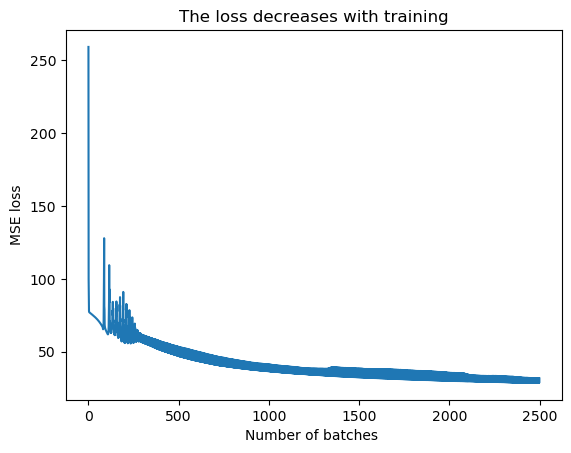

In [95]:
plt.plot(loss_values)
plt.title("The loss decreases with training")
plt.xlabel("Number of batches ")
plt.ylabel("MSE loss")

In [92]:
X_test_tensor = X_test.to(device)
Y_test_tensor = Y_test.to(device)
model.eval()
Y_pred = model(X_test_tensor)

Text(0.5, 1.0, 'Testing the model')

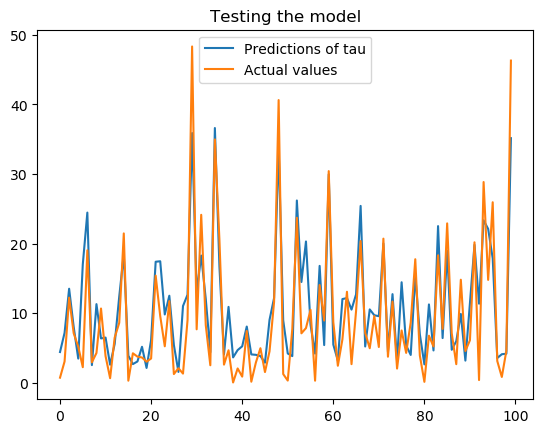

In [94]:
plt.plot(Y_pred[:100].detach().cpu().numpy(), label='Predictions of tau')
plt.plot(Y_test[:100], label='Actual values')

plt.legend()
plt.title("Testing the model")

We can clearly see that the predition and the actual walue of $\tau$ are fitting. We hence deduce that we can train our neural network to predict with high accuracy the time $\tau$ when the intensity changes.